In [26]:
import pandas as pd
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#read csv into pandas dataframe
imu_data = pd.read_csv('CompassLog_2_c1.csv')

In [28]:
#quick view of the data
imu_data.head()

,timeITOW (msec),time (s),roll (deg),pitch (deg),heading (deg),xAccel (m/s^2),yAccel (m/s^2),zAccel (m/s^2),xMag (Gauss),yMag (Gauss),zMag (Gauss)
0,11395650,11395.65,0.1175,-0.3374,89.8879,-0.0575,-0.0200,-9.7686,0.0023,-0.2913,0.3026
1,11395750,11395.75,0.1343,-0.3706,89.8369,-0.0634,-0.0230,-9.8040,0.0028,-0.2913,0.3024
2,11395850,11395.85,0.1336,-0.2939,89.8118,-0.0502,-0.0228,-9.7956,0.0025,-0.2915,0.3024
3,11395950,11395.95,0.0437,-0.2030,89.6074,-0.0347,-0.0075,-9.7876,0.0031,-0.2916,0.3023
4,11396050,11396.05,0.0246,-0.3455,89.8671,-0.0591,-0.0042,-9.7993,0.0025,-0.2916,0.3024


In [29]:
"""
    The following functions are used to calculate the pitch and roll of the IMU
    Varaints of each of these functions are used to calculate the pitch and roll in degrees and radians
    https://mwrona.com/posts/accel-roll-pitch/ <- this is where I got the formulas from
    More on them from in the one note shared from Michael I believe
"""
def calculate_pitch_degrees(accel_x):
    return round(degrees(asin(accel_x/9.8)), 4)
def calculate_roll_degrees(accel_y, accel_z):
    return round(degrees(atan(accel_y/accel_z)), 4)
def calculate_pitch_radians(accel_x):
    return round((asin(accel_x/9.8)), 4)
def calculate_roll_radians(accel_y, accel_z):
    return round((atan(accel_y/accel_z)), 4)

"""
    Equations from: https://www.instructables.com/Tilt-Compensated-Compass/ under the "Determining the compass heading" heading

"""

#still not entirely sure why the xH and yH had to be negated
def calculate_mag_tilt(mag_x, mag_y, mag_z, pitch ,roll):
    xH = -(mag_x * cos(pitch) + mag_y * sin(roll) * sin(pitch) - mag_z * cos(roll) * sin(pitch))
    yH = -(mag_y * cos(roll) + mag_z * sin(roll))
    return xH, yH
def calculate_heading(mag_x, mag_y, mag_z, pitch ,roll):
    xH, xY = calculate_mag_tilt(mag_x, mag_y, mag_z, pitch ,roll)
    return round(degrees(atan2(xY, xH)), 4)


In [42]:
mag_x = imu_data['xMag (Gauss)'][0]
mag_z = imu_data['zMag (Gauss)'][0]
mag_y = imu_data['yMag (Gauss)'][0]
print(f"Mag x: {mag_x} Mag y: {mag_y} Mag z: {mag_z}")
pitch = calculate_pitch_radians(imu_data['xAccel (m/s^2)'][0])
roll = calculate_roll_radians(imu_data['yAccel (m/s^2)'][0], imu_data['zAccel (m/s^2)'][0])
print(f"Calulated pitch: {pitch} Calculated roll: {roll}")
xH = mag_x * cos(pitch) + mag_z * sin(pitch)
xH *= -1
yH = mag_x * sin(roll) * sin(pitch) + mag_y * cos(roll) - mag_z * sin(roll) * cos(pitch)
yH *= -1
heading = calculate_heading(mag_x, mag_y, mag_z, pitch ,roll)
print(f"Calculated heading: {heading}")

Mag x: 0.0023 Mag y: -0.2913 Mag z: 0.3026
Calulated pitch: -0.0059 Calculated roll: 0.002
Calculated heading: 90.8058


In [31]:
#Calulating pitch, roll, and heading and inserting it into our data frame
#continue for the next few cells
observed_roll_col_index = imu_data.columns.get_loc('roll (deg)')
imu_data.insert(loc=observed_roll_col_index + 1, column='Calculated roll (degrees)', value=imu_data.apply(lambda row: calculate_roll_degrees(row['yAccel (m/s^2)'], row['zAccel (m/s^2)']), axis=1))

In [32]:
imu_data.head()

,timeITOW (msec),time (s),roll (deg),Calculated roll (degrees),pitch (deg),heading (deg),xAccel (m/s^2),yAccel (m/s^2),zAccel (m/s^2),xMag (Gauss),yMag (Gauss),zMag (Gauss)
0,11395650,11395.65,0.1175,0.1173,-0.3374,89.8879,-0.0575,-0.0200,-9.7686,0.0023,-0.2913,0.3026
1,11395750,11395.75,0.1343,0.1344,-0.3706,89.8369,-0.0634,-0.0230,-9.8040,0.0028,-0.2913,0.3024
2,11395850,11395.85,0.1336,0.1334,-0.2939,89.8118,-0.0502,-0.0228,-9.7956,0.0025,-0.2915,0.3024
3,11395950,11395.95,0.0437,0.0439,-0.2030,89.6074,-0.0347,-0.0075,-9.7876,0.0031,-0.2916,0.3023
4,11396050,11396.05,0.0246,0.0246,-0.3455,89.8671,-0.0591,-0.0042,-9.7993,0.0025,-0.2916,0.3024


In [33]:
observed_roll_col_index = imu_data.columns.get_loc('pitch (deg)')
imu_data.insert(loc=observed_roll_col_index + 1, column='Calculated pitch (degrees)', value=imu_data.apply(lambda row: calculate_pitch_degrees(row['xAccel (m/s^2)']), axis=1))

In [34]:
imu_data.head()

,timeITOW (msec),time (s),roll (deg),Calculated roll (degrees),pitch (deg),Calculated pitch (degrees),heading (deg),xAccel (m/s^2),yAccel (m/s^2),zAccel (m/s^2),xMag (Gauss),yMag (Gauss),zMag (Gauss)
0,11395650,11395.65,0.1175,0.1173,-0.3374,-0.3362,89.8879,-0.0575,-0.0200,-9.7686,0.0023,-0.2913,0.3026
1,11395750,11395.75,0.1343,0.1344,-0.3706,-0.3707,89.8369,-0.0634,-0.0230,-9.8040,0.0028,-0.2913,0.3024
2,11395850,11395.85,0.1336,0.1334,-0.2939,-0.2935,89.8118,-0.0502,-0.0228,-9.7956,0.0025,-0.2915,0.3024
3,11395950,11395.95,0.0437,0.0439,-0.2030,-0.2029,89.6074,-0.0347,-0.0075,-9.7876,0.0031,-0.2916,0.3023
4,11396050,11396.05,0.0246,0.0246,-0.3455,-0.3455,89.8671,-0.0591,-0.0042,-9.7993,0.0025,-0.2916,0.3024


In [35]:
observed_roll_col_index = imu_data.columns.get_loc('heading (deg)')
imu_data.insert(loc=observed_roll_col_index + 1, column='Calculated heading (degrees)', value=imu_data.apply(lambda row: calculate_heading(row['xMag (Gauss)'], row['yMag (Gauss)'], row['zMag (Gauss)'], calculate_pitch_radians(row['xAccel (m/s^2)']), calculate_roll_radians(row['xAccel (m/s^2)'], row['zAccel (m/s^2)']) ), axis=1))
imu_data.head()

,timeITOW (msec),time (s),roll (deg),Calculated roll (degrees),pitch (deg),Calculated pitch (degrees),heading (deg),Calculated heading (degrees),xAccel (m/s^2),yAccel (m/s^2),zAccel (m/s^2),xMag (Gauss),yMag (Gauss),zMag (Gauss)
0,11395650,11395.65,0.1175,0.1173,-0.3374,-0.3362,89.8879,90.8105,-0.0575,-0.0200,-9.7686,0.0023,-0.2913,0.3026
1,11395750,11395.75,0.1343,0.1344,-0.3706,-0.3707,89.8369,90.9461,-0.0634,-0.0230,-9.8040,0.0028,-0.2913,0.3024
2,11395850,11395.85,0.1336,0.1334,-0.2939,-0.2935,89.8118,90.8002,-0.0502,-0.0228,-9.7956,0.0025,-0.2915,0.3024
3,11395950,11395.95,0.0437,0.0439,-0.2030,-0.2029,89.6074,90.8206,-0.0347,-0.0075,-9.7876,0.0031,-0.2916,0.3023
4,11396050,11396.05,0.0246,0.0246,-0.3455,-0.3455,89.8671,90.8550,-0.0591,-0.0042,-9.7993,0.0025,-0.2916,0.3024


In [36]:
max_pitch = imu_data['Calculated pitch (degrees)'].max()
min_pitch = imu_data['Calculated pitch (degrees)'].min()

max_roll = imu_data['Calculated roll (degrees)'].max()
min_roll = imu_data['Calculated roll (degrees)'].min()

max_heading = imu_data['Calculated heading (degrees)'].max()
min_heading = imu_data['Calculated heading (degrees)'].min()

print(f"Max and min pitch: {max_pitch}, {min_pitch}")
print(f"Max and min roll: {max_roll}, {min_roll}")
print(f"Max and min heading: {max_heading}, {min_heading}")

Max and min pitch: -0.0129, -0.6531
Max and min roll: 0.4111, -0.1306
Max and min heading: 98.3832, 89.6462


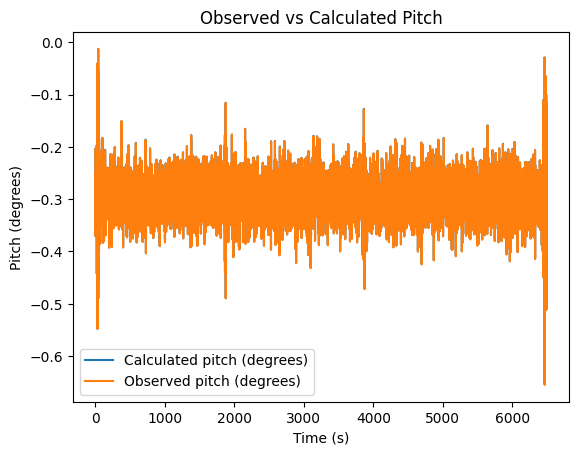

In [43]:
plt.plot(imu_data['Calculated pitch (degrees)'], label='Calculated pitch (degrees)')
plt.plot(imu_data['pitch (deg)'], label='Observed pitch (degrees)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pitch (degrees)')
plt.title('Observed vs Calculated Pitch')
plt.show()

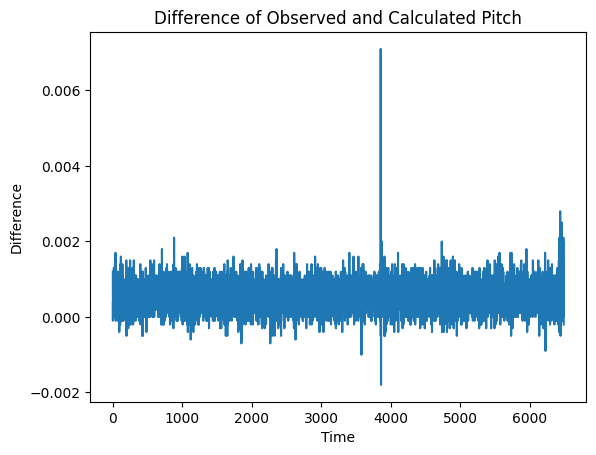

In [46]:
time = np.arange(0, len(imu_data['Calculated pitch (degrees)']))
calculated_pitch = imu_data['Calculated pitch (degrees)']
observed_pitch = imu_data['pitch (deg)']
difference = (calculated_pitch - observed_pitch) 

plt.plot(time, difference)
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference of Observed and Calculated Pitch')
plt.show()

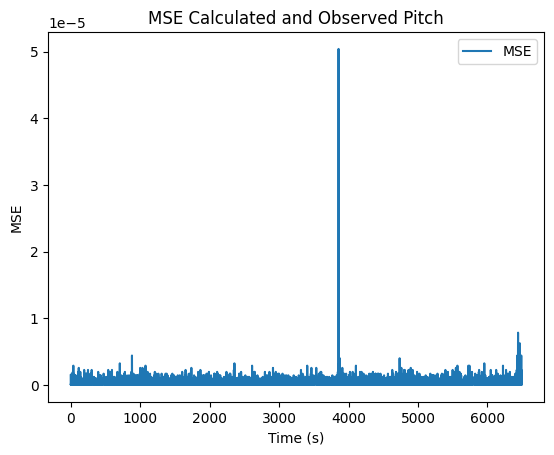

In [47]:
calculated_pitch = imu_data['Calculated pitch (degrees)']
observed_pitch = imu_data['pitch (deg)']

mse = ((calculated_pitch-observed_pitch)**2)
len(mse)

plt.plot(mse, label='MSE')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('MSE')
plt.title('MSE Calculated and Observed Pitch')
plt.show()

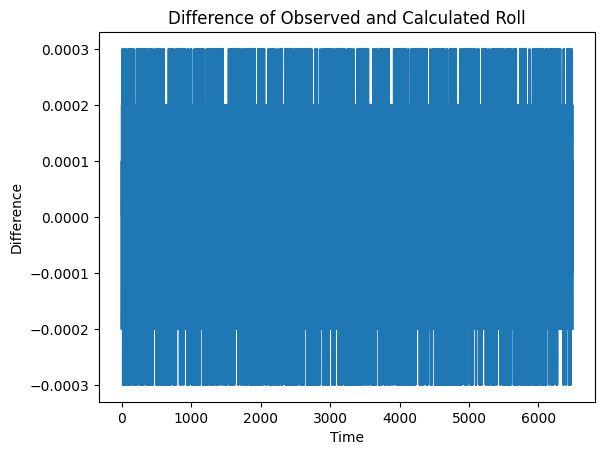

In [49]:
time = np.arange(0, len(imu_data['Calculated roll (degrees)']))
calculated_roll = imu_data['Calculated roll (degrees)']
observed_roll = imu_data['roll (deg)']
difference = (calculated_roll - observed_roll) 

plt.plot(time, difference)
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference of Observed and Calculated Roll')
plt.show()

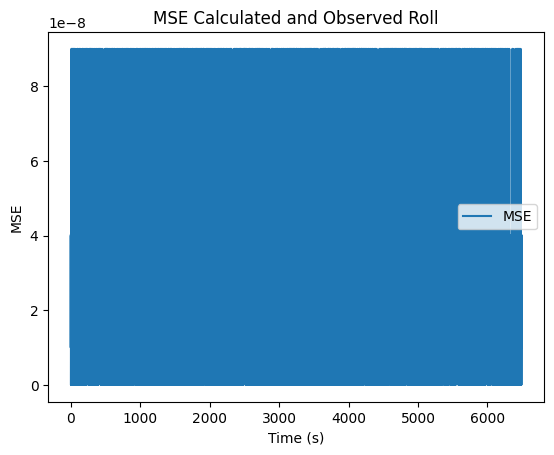

In [50]:
mse = ((calculated_roll-observed_roll)**2)
len(mse)

plt.plot(mse, label='MSE')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('MSE')
plt.title('MSE Calculated and Observed Roll')
plt.show()

In [52]:
#Hard to tell from above but roll has very little error
print(mse.mean())

3.026494146642024e-08


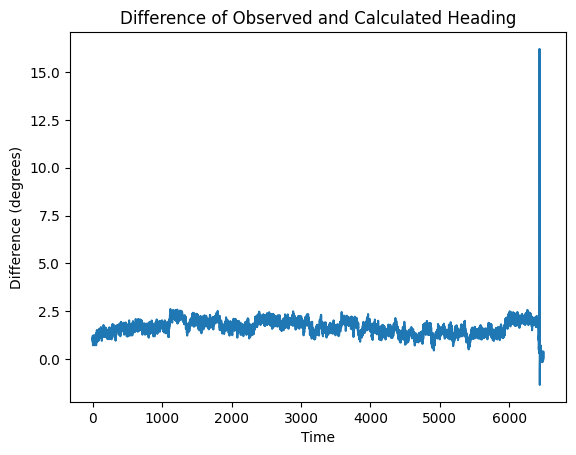

In [55]:
time = np.arange(0, len(imu_data['Calculated heading (degrees)']))
calculated_heading = imu_data['Calculated heading (degrees)']
observed_heading = imu_data['heading (deg)']
difference = (calculated_heading - observed_heading) 

plt.plot(time, difference)
plt.xlabel('Time')
plt.ylabel('Difference (degrees)')
plt.title('Difference of Observed and Calculated Heading')
plt.show()

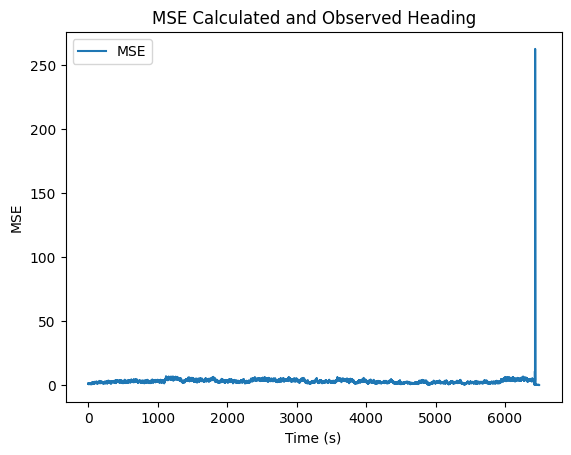

In [57]:
mse = ((calculated_heading-observed_heading)**2)
len(mse)

plt.plot(mse, label='MSE')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('MSE')
plt.title('MSE Calculated and Observed Heading')
plt.show()

In [62]:
#One very big outlier messing up mse right now
print(mse.mean())

2.9475353485536044
262.8970388100001
19135.39948281
2.9074876666153138
